In [1]:
#Sarah Wofford
## Digital Advertising
### Python Excercises - MSBuAn at CU Boulder
####Analyzing Facebook Advertising Data and looking at Cost Effectiveness per Day of Week

In [2]:
#Getting the data loaded and manipulated into a pandas dataframe before beginning analysis
#CSV file will be available on GitHub

#this imports the pandas package into your script
import pandas

#Import Travel Pony csv as a dataframe
trvlp = 'Travel Pony Facebook.csv'

#travel pony data as a data frame
trvlp = pandas.read_csv('Travel Pony Facebook.csv')


In [3]:
#Create calculations in order to analyze the most cost efficient and effective day to advertise on Facebook.

#create costperimpression as a new column
trvlp['Cost per Impression'] = trvlp['Amount Spent (USD)']/ trvlp['Impressions']
print(trvlp['Cost per Impression']).mean()

#create a day of week column
trvlp['New Date'] = pandas.to_datetime(trvlp['Start Date'])
trvlp['Day of Week'] = trvlp['New Date'].dt.dayofweek

#When considering 'cost per impression', 
#what day of the week works best? (What day is it cheapest to generate impressions) 

#calculate the average CPI per day
averageCPIday = trvlp.groupby(['Day of Week']).mean()

averageCPI = trvlp['Cost per Impression'].mean()
print (averageCPI)
#overall avg CPI is: 0.0032364524901808086 or $0.0323

##When considering 'cost per impression', 
#what day of the week works best? (What day is it cheapest to generate impressions) 
##Answer##: 
#          Day 5 (Saturday) shows the cheapest CPI (cost per impression) at $0.002628
#          per impression served. This also calculates to a $2.63 CPM which is almost $0.01 
#          below the average CPI of $0.0323CPI / $3.23 CPM.


#What day works worst? (What day is most expensive)
#Answer: 
#       Day 4 (Friday) showed the highest CPI (cost per impression) at $0.0040968
#       per impression served.  This calculates to a $4.10 CPM.  This is more expensive than the
#       overall CPI average - $0.0323 ($3.23 CPM)




0       0.000466
1       0.000652
2       0.000448
3       0.000452
4       0.002464
5       0.006226
6       0.006794
7       0.003177
8       0.007506
9       0.003646
10      0.005950
11      0.003829
12      0.003682
13      0.003693
14      0.004398
15      0.006546
16      0.004955
17      0.006532
18      0.004904
19      0.002315
20      0.003578
21      0.002955
22      0.002569
23      0.007346
24      0.003092
25      0.002286
26      0.005858
27      0.002533
28      0.002991
29      0.003798
          ...   
3675    0.000441
3676    0.000000
3677    0.000000
3678    0.003034
3679    0.002848
3680    0.000000
3681    0.000000
3682    0.000000
3683    0.002058
3684    0.000000
3685    0.000248
3686    0.000261
3687    0.000284
3688    0.000274
3689    0.000236
3690    0.000211
3691    0.000752
3692    0.014085
3693    0.012947
3694    0.010768
3695    0.009986
3696    0.002218
3697    0.003214
3698    0.003840
3699    0.002924
3700    0.003512
3701    0.002936
3702    0.0089

AttributeError: 'NoneType' object has no attribute 'mean'

In [4]:
#Next, we take a look at the CORRELATION between "Amount Spent" and the following variables: 
    #1-Reach
    #2-Frequency
    #3-Unique Clicks
    #4-Page Likes

/Users/sarahwofford/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sarahwofford/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sarahwofford/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sarahwofford/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/s

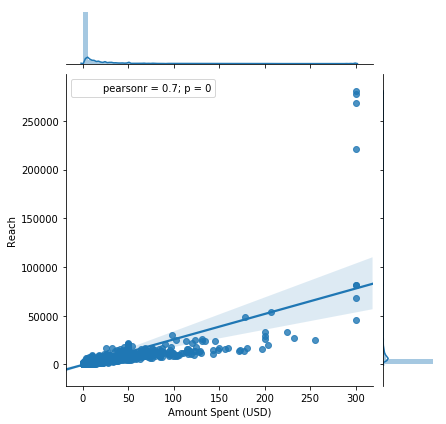

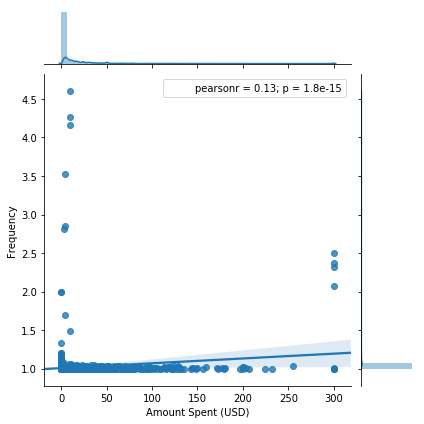

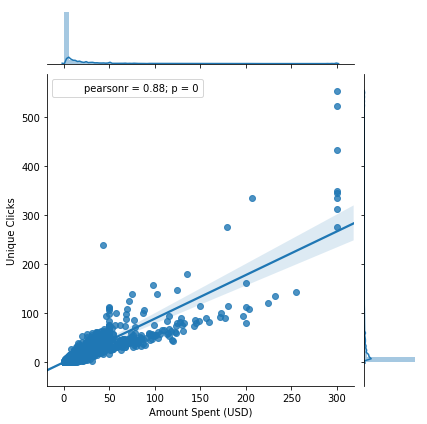

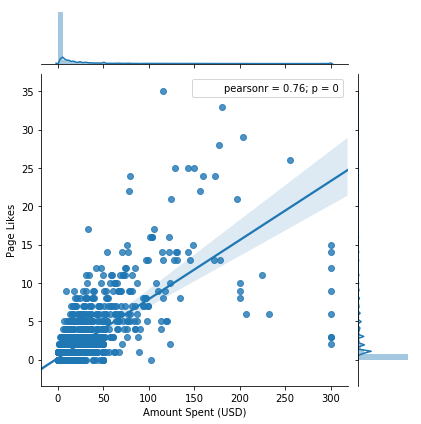

In [7]:
#Correlations#
##this imports our graphing tool, seaborn as 'sns'
import seaborn as sns

#Example of syntax for making a plot from class:
#sns.jointplot("Cost", "Conversions", data=adataframe, kind='reg');
#use this as a reminder of the nuances each coding languages has for its syntax

trvlcorrelations = trvlp.corr() #use the chart from trvlcorrelations to make analysis

#could also plot if needed
#Create correlations for Amount Spent v. variables

#Amount spent vs. Reach
sns.jointplot('Amount Spent (USD)', 'Reach', data=trvlp, kind='reg')

#Amount spent vs. Frequency
sns.jointplot('Amount Spent (USD)', 'Frequency', data=trvlp, kind='reg')

#Amount spent vs. Unique Clicks
sns.jointplot('Amount Spent (USD)', 'Unique Clicks', data=trvlp, kind='reg')

#Amount spent vs. Page Links
sns.jointplot('Amount Spent (USD)', 'Page Likes', data=trvlp, kind='reg')

#Which correlation is the strongest? 
###Amount Spent : Unique Clicks has the strongest correlation of 0.88299

In [8]:
#Finally, a multiple regression analysis is performed where Unique Clicks is the dependent variable
#and Reach and Frequency are the independent (predictor) variables.

In [9]:
#Import packages to support multiple regression analysis
import statsmodels.api as sm
import numpy as np

#create a data frame from the Travel Pony data using pulling only the Unique Clicks column
target = pandas.DataFrame(trvlp, columns=['Unique Clicks'])

#assign values to use later in analysis
X = trvlp['Reach']
Z = trvlp['Frequency']
Y = target['Unique Clicks']

#Create the model
#make the predictions by model
#print out the statistics

#Correlation between Unique Clicks and Reach
model=sm.OLS(Y,X).fit() #Create the model
predictions= model.predict(X) #make the predictions by model
model.summary() #print out the statistics

#Correlation between Unique Clicks and Frequency
model2=sm.OLS(Y,Z).fit() #Create the model
predictions2= model.predict(Z) #make the predictions by model
model2.summary() #print out the statistics


#What variable more strongly predicts Unique Clicks?
# --> Frequency (r-square value of 0.089)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unique Clicks   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     363.1
Date:                Thu, 18 Oct 2018   Prob (F-statistic):           2.64e-77
Time:                        21:52:19   Log-Likelihood:                -17307.
No. Observations:                3705   AIC:                         3.462e+04
Df Residuals:                    3704   BIC:                         3.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Frequency      7.9291      0.416     19.056      0.000       7.113       8.745
==============================================================================
Omnibus:                     5923.176   Durbin-Watson:                   0.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3853539.229
Skew:                          10.278   Prob(JB):                         0.00
Kurtosis:                     159.651   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""